In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import objective_functions
import utils
import plots

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe modele mutacji

In [2]:
d = 2
objective_function = objective_functions.F1a
original_individual = np.array([[1, 1]])

In [3]:
def 𝑁(mean, std, shape=1):
	return np.random.normal(mean, std, size=shape)

In [4]:
# https://geostatisticslessons.com/lessons/errorellipses

def degrees(v, u):
	v = v / np.linalg.norm(v)
	u = u / np.linalg.norm(u)
	return np.arccos(v @ u) * 180 / np.pi

def mutate(individual, n, S):
	return original_individual + (np.random.randn(n, 2) @ np.linalg.cholesky(S).T)

def beneficial_mutation_fraction(f, individual, n, S):
	original_score = f(individual)
	mutations = mutate(individual, n, S)
	return sum(v > original_score for v in f(mutations)) / n

def leaders(f, individual, n, S, times=1000):
	return [max(f(mutate(individual, n, S))) for _ in range(times)]

def plot_mutation_model(S, n=10000, title=""):
	vals, vects = np.linalg.eig(S)
	chi22_005 = 5.991 # 4?
	lengths = np.sqrt(vals*chi22_005)
	print("Axes:", lengths)
	vv = vects * lengths
	mutations = mutate(original_individual, n, S)
	plots.plot_mutations(objective_function, mutations, original_individual, title=title)
	plt.gca().add_patch(Ellipse(
		original_individual.squeeze(),
		width=2*lengths[0],
		height=2*lengths[1],
		angle=degrees(vv[:,1], np.array([0, 1])),
		linewidth=3,
		color="black",
		alpha=0.4,
		zorder=10))
	plt.show()

In [5]:
models = [
	np.diag((0.5**2, 0.5**2)),
	np.diag(np.array((0.25, 0.5))**2),
	np.array([[0.25, 0.25], [0.25, 0.5]])
]

ofs = {
	objective_functions.F1: "Sphere",
	objective_functions.F6: "Rastrigin",
	objective_functions.F7: "Schwefel",
	objective_functions.F8: "Griewank"
}

In [6]:
def simulation(f, model):
	return leaders(f, original_individual, 1000, models[model])

lds = utils.Archives(
	simulation,
	of = list(ofs.keys()),
	S = [0, 1, 2]
)

In [7]:
def simulation(f, model):
	return beneficial_mutation_fraction(f, original_individual, 1000000, models[model])

bmf = utils.Archives(
	simulation,
	of = list(ofs.keys()),
	S = [0, 1, 2]
)

### Model 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

Axes: [1.22382597 1.22382597]


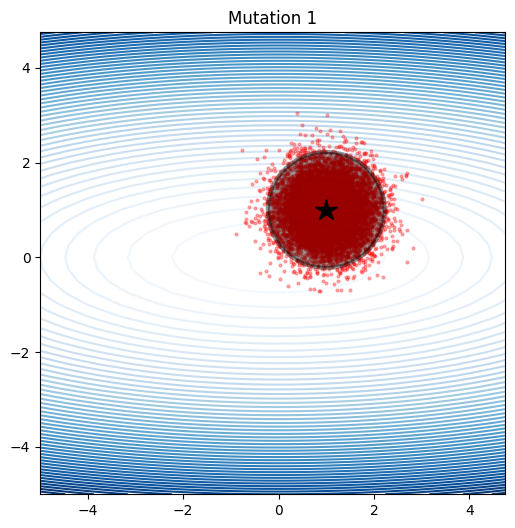

In [8]:
plot_mutation_model(models[0], title="Mutation 1")

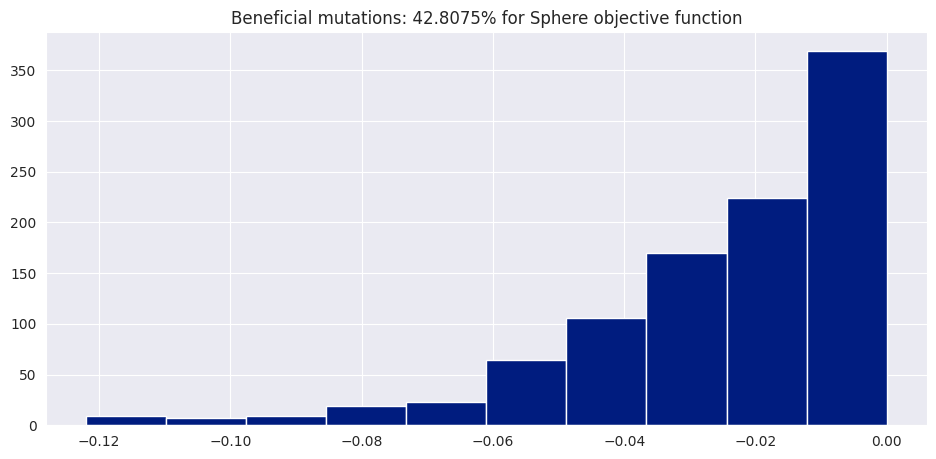

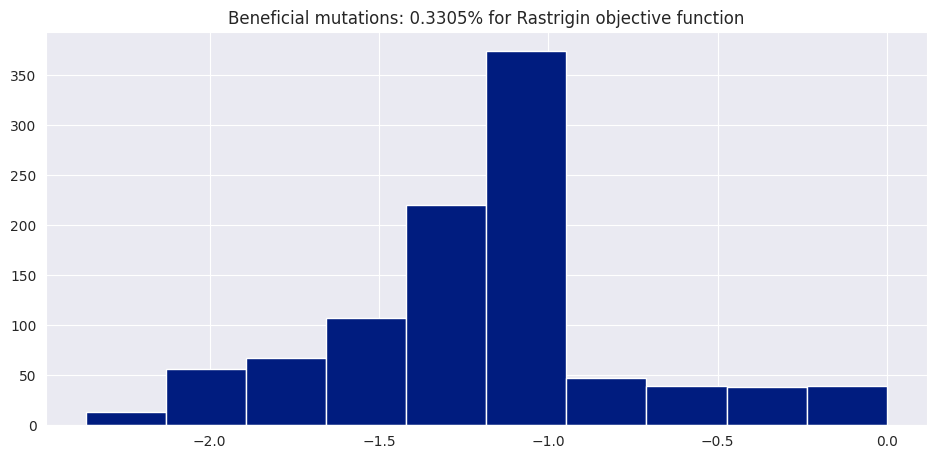

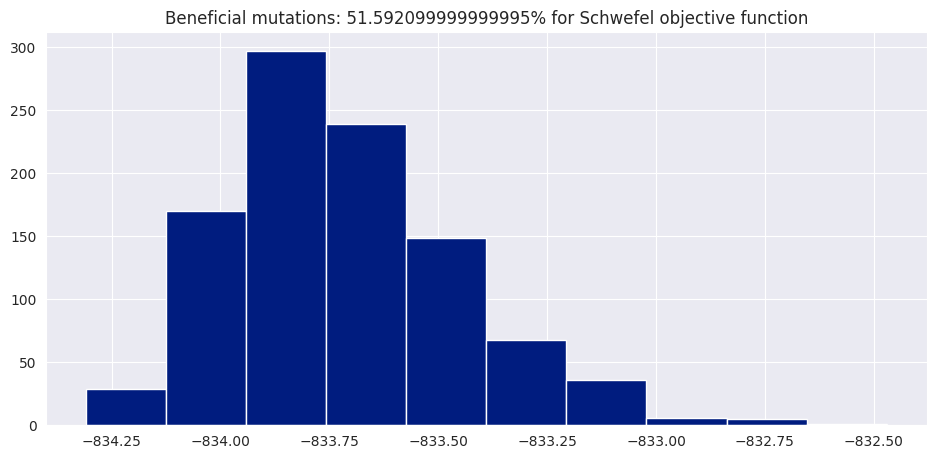

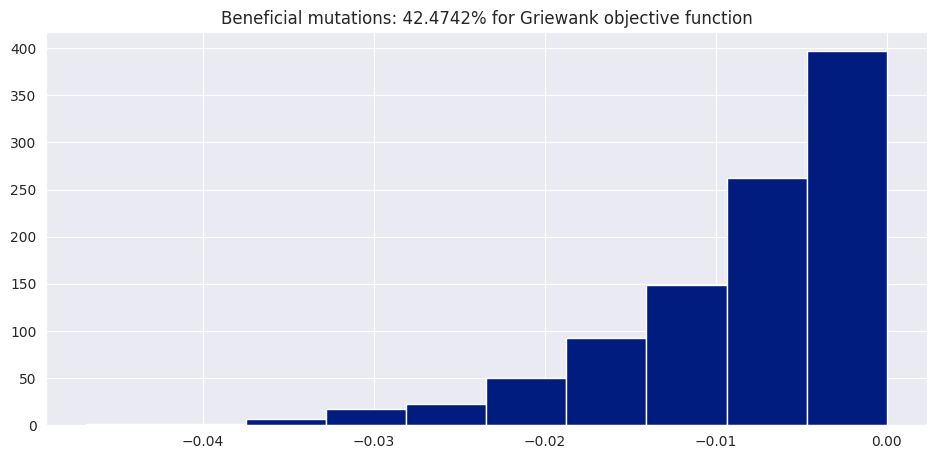

In [9]:
for of in ofs:
	bmfi = bmf.where("of", of).where("S", 0).pick("f")[0][0]
	utils.histogram(lds.where("of", of).where("S", 0).pick("f")[0], title=f"Beneficial mutations: {bmfi*100}% for {ofs[of]} objective function")

### Model 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

Axes: [0.61191298 1.22382597]


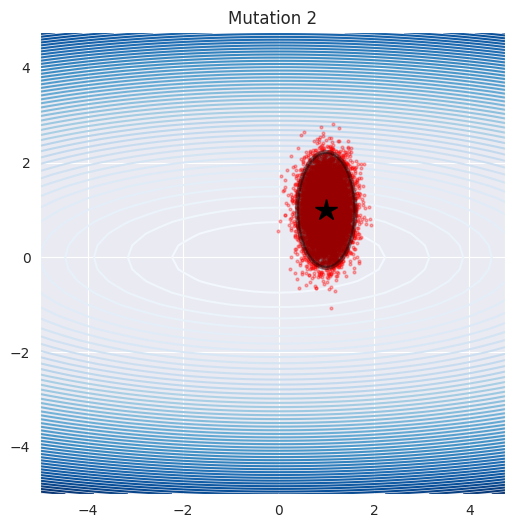

In [10]:
plot_mutation_model(models[1], title="Mutation 2")

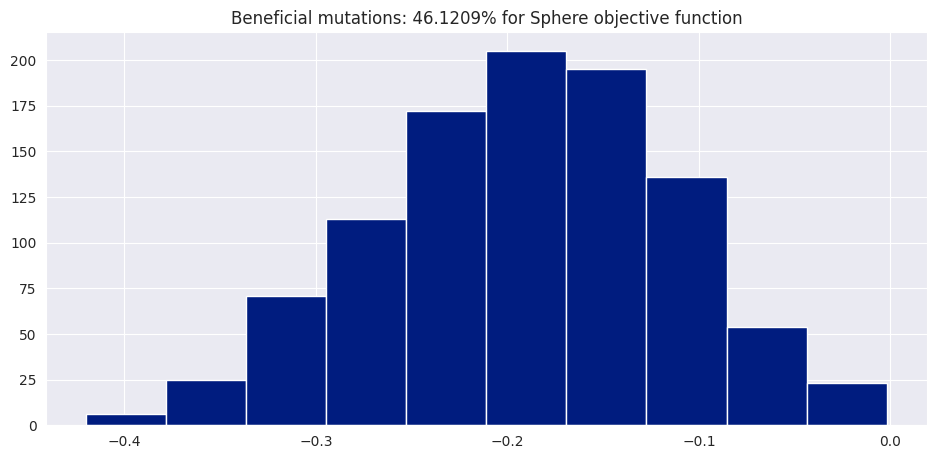

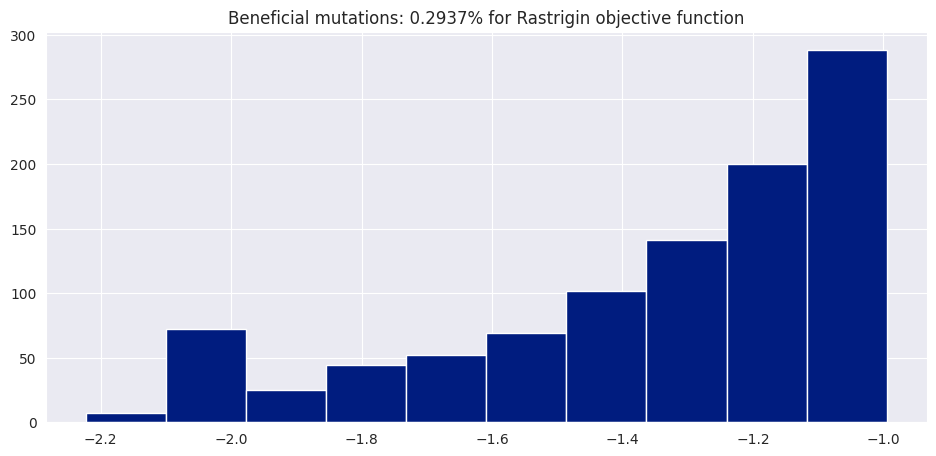

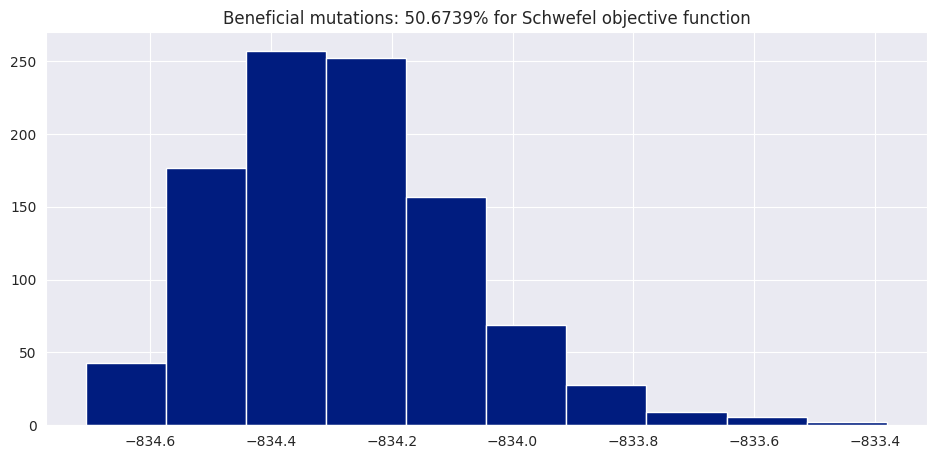

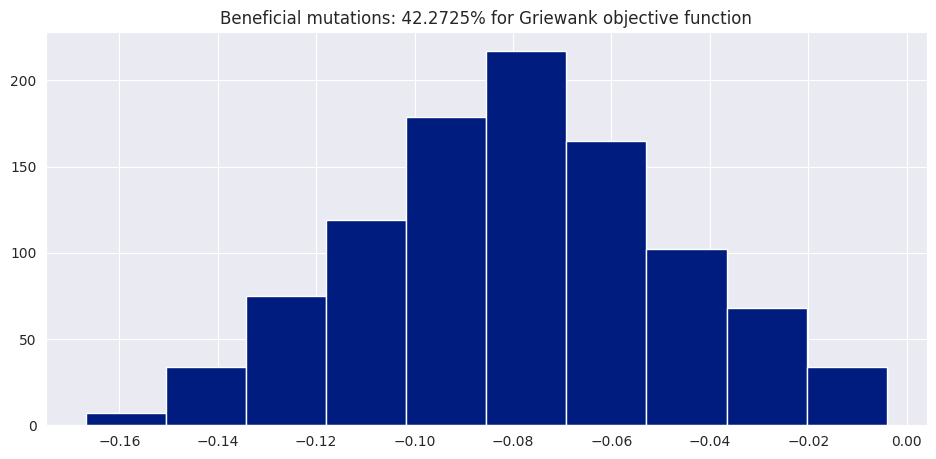

In [13]:
for of in ofs:
	bmfi = bmf.where("of", of).where("S", 1).pick("f")[0][0]
	utils.histogram(lds.where("of", of).where("S", 1).pick("f")[0], title=f"Beneficial mutations: {bmfi*100}% for {ofs[of]} objective function")

### Model 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

Axes: [0.75636604 1.98019201]


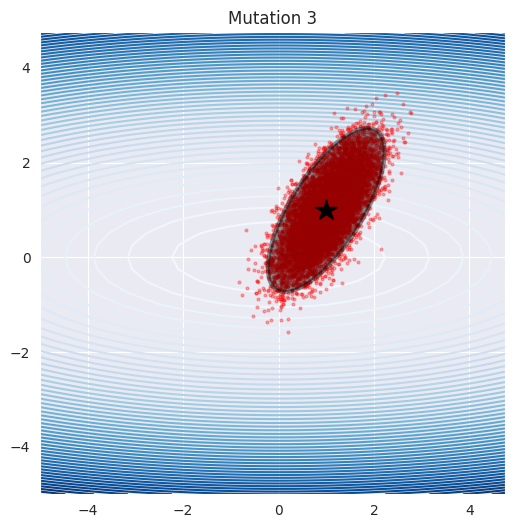

In [12]:
plot_mutation_model(models[2], title="Mutation 3")

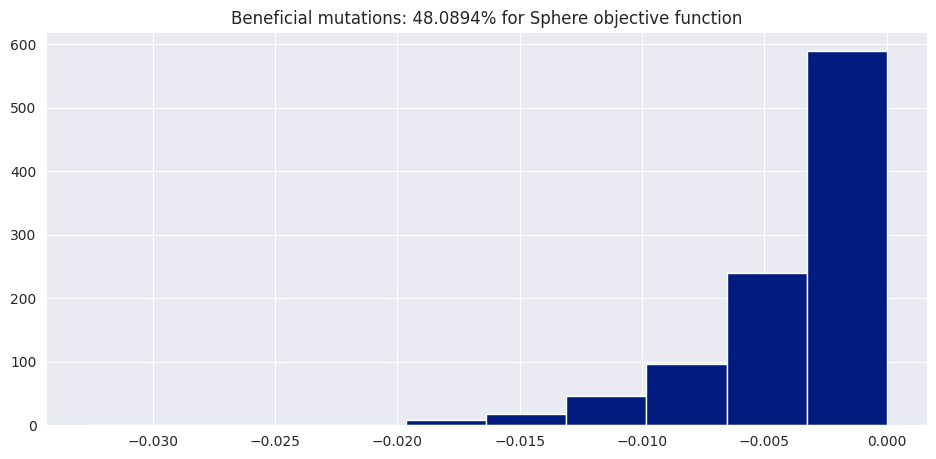

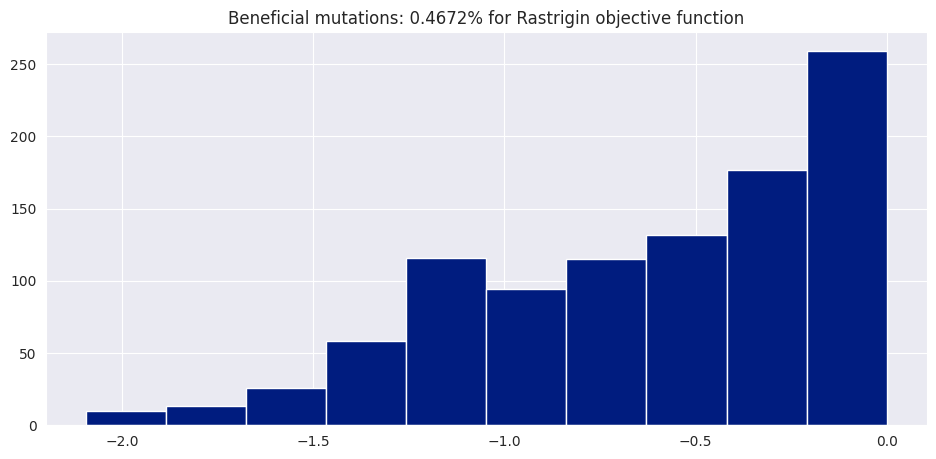

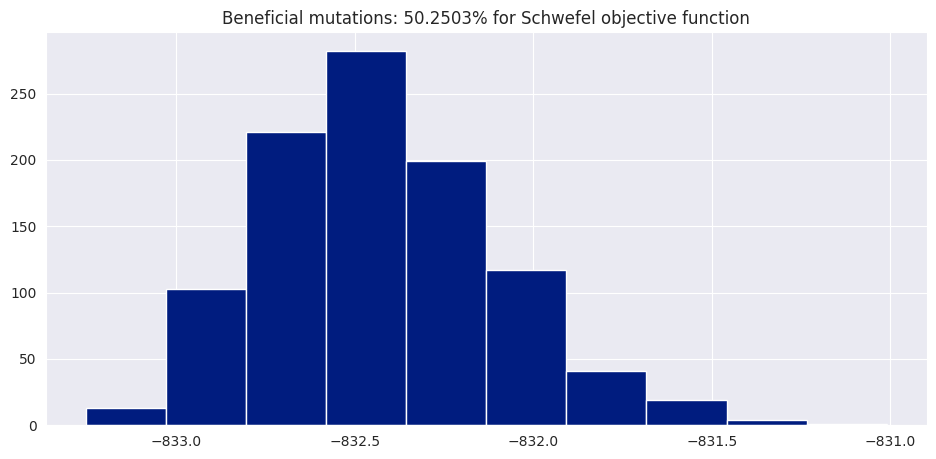

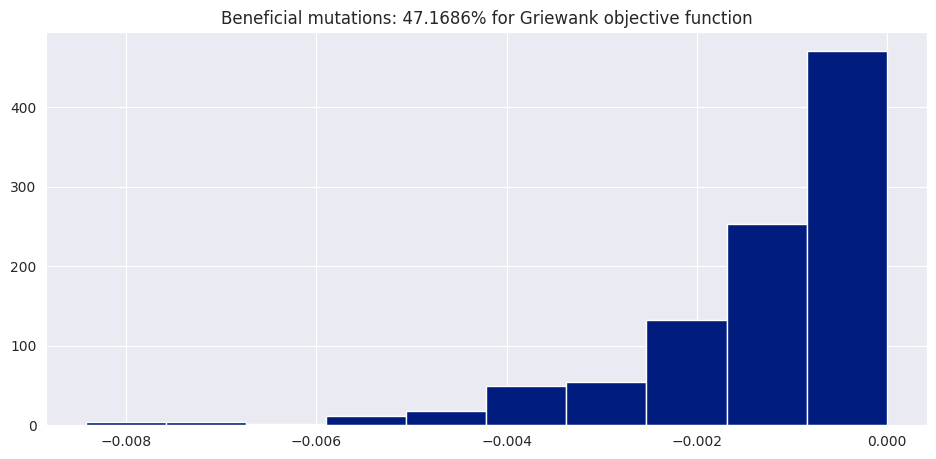

In [14]:
for of in ofs:
	bmfi = bmf.where("of", of).where("S", 2).pick("f")[0][0]
	utils.histogram(lds.where("of", of).where("S", 2).pick("f")[0], title=f"Beneficial mutations: {bmfi*100}% for {ofs[of]} objective function")